### Задача 1 – Умножение матриц

Напишите функцию для умножения матриц, используя только списки и циклы.

Не забывайте проверить, что умножение выполнить возможно.
Напомним, что две матрицы могут быть перемножены, если число столбцов первой матрицы равно числу строк второй матрицы. Если матрица
$A$ имеет размер $m×n$ ($m$ строк и $nя$ столбцов), а матрица $B$ имеет размер $n×p$, то их произведение $C=AB$ будет иметь размер $m×p$.

Если $A=(a_{ij})$ — матрица размера $m×n$, а $B=(b_{jk})$ — матрица размера $n×p$, то элемент $c_{ik}$ матрицы $C=AB$ вычисляется по формуле:

$$c_{ik}=\sum_{j=1}^{n}a_{ij}b_{jk}$$

То есть каждый элемент новой матрицы является суммой произведений соответствующих элементов строки первой матрицы и столбца второй.

In [3]:
import numpy as np

matrix1 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = np.array([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

def matrix_multiplication(matrix1, matrix2):
    # проверка совместимости матриц для умножения
    if len(matrix1[0]) != len(matrix2):
        raise ValueError("Ошибка. Количество столбцов первой матрицы должно совпадать с количеством строк второй матрицы.")

    result = [[0 for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))] # заполнение нулями результирующей матрицы

    # умножение матриц
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]

    return result

# конвертация матриц в списки
matrix1_list = matrix1.tolist()
matrix2_list = matrix2.tolist()

result = matrix_multiplication(matrix1_list, matrix2_list)
print("Произведение матриц:")
for row in result:
    print(row)

Произведение матриц:
[30, 24, 18]
[84, 69, 54]
[138, 114, 90]


### Задача 2 – Функции

Дано две функции:

\begin{matrix} F(x) = a_{11}x^2 + a_{12}x + a_{13}&(1) \\ P(x) = a_{21}x^2+a_{22}x + a_{23} &(2) \end{matrix}
​
* На вход программа должна принимать 2 строки. Каждая строка содержит 3 действительных числа через пробел: коэффициенты $a$.
* Необходимо найти точки экстремума функций (например, через функцию [`minimize_scalar()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html), [`fmin()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) и др.) и определить, есть ли у функций общие решения при введенных коэффициентах на некотором диапазоне значений $x$, предусмотрев ситуации, когда решения есть, решений нет и решений бесконечно много.


In [9]:
def functions(a_1, a_2):

    # парсинг коэффициентов
    a1 = list(map(int, a_1.split()))
    a2 = list(map(int, a_2.split()))

    if a1 == a2: # проверка на идентичность функций
        print("Бесконечно много решений.")
        return None

    def f(x):
        return a1[0] * (x ** 2) + a1[1] * x + a1[2]

    def p(x):
        return a2[0] * (x ** 2) + a2[1] * x + a2[2]

    roots = []

    for x in range(-100, 101): # поиск общих решений
        f_value = f(x)
        p_value = p(x)
        if abs(f_value - p_value) < 0.01:  # с учетом погрешности
            roots.append((x, round(f_value, 2)))

    def find_extremum(coeffs): # поиск точек экстремумов
        a, b, _ = coeffs
        x_extremum = -b / (2 * a)  # x экстремум
        y_extremum = a * (x_extremum ** 2) + b * x_extremum + coeffs[2]  # y экстремум
        return x_extremum, y_extremum

    extremum_f = find_extremum(a1)
    extremum_p = find_extremum(a2)

    print(f"Точка экстремума функции F(x): x = {extremum_f[0]:.3f}, F(x) = {extremum_f[1]:.3f}")
    print(f"Точка экстремума функции P(x): x = {extremum_p[0]:.3f}, P(x) = {extremum_p[1]:.3f}")

    if roots:
        print("Есть общие решения:")
        for root in roots:
            print(f"x = {root[0]}, значение функции = {root[1]}")
    else:
        print("Общих решений нет")

    return roots

a_1 = input("Введите коэффициенты для первой функции (через пробел): ")
a_2 = input("Введите коэффициенты для второй функции (через пробел): ")

results = functions(a_1, a_2)

if results:
    print(f"Все найденные решения: {results}")

Введите коэффициенты для первой функции (через пробел): 5 6 12
Введите коэффициенты для второй функции (через пробел): 10 6 8
Точка экстремума функции F(x): x = -0.600, F(x) = 10.200
Точка экстремума функции P(x): x = -0.300, P(x) = 7.100
Общих решений нет


### Задача 3 – Коэффициент асимметрии и эксцесса

Напишите функцию, которая для случайной выборки рассчитывает коэффициенты асимметрии и эксцесса.

Коэффициент асимметрии:

$$A_3=\frac{m_3}{\sigma^3}$$

Коэффициент эксцесса:

$$E_4=\frac{m_4}{\sigma^4}-3$$

С помощью этих коэффициентов можно прикинуть, насколько близко распределение выборки к нормальному. Для расчета этих коэффициентов понадобится рассчитать центральные моменты третьего ($m_3$) и четвертого ($m_4$) порядка. Основные формулы, которые понадобятся для расчетов:
1. Момент второго порядка (он же – дисперсия):
$$m_2=D_e=\frac{∑(x_i-\overline{x_e})^2\times n_i}{n}$$
2. Момент третьего порядка:
$$m_3=\frac{∑(x_i-\overline{x_e})^3\times n_i}{n}$$
3. Момент четвертого порядка:
$$m_4=\frac{∑(x_i-\overline{x_e})^4\times n_i}{n}$$

В формулах выше $\overline{x_e}$ – это выборочное среднее.
$$\overline{x_e}=\frac{∑(x_i\times n_i)}{n},$$
где $x_i$ – $i$-е значение из выборки, $n_i$ – число раз, когда $x_i$ встретилось в выборке, $n$ – объем выборки.


Проверить корректность расчетов можно с помощью функции [`kurtosis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) для коэффициента эксцесса и функции [`skew`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html) из `scipy`.

**Коэффициент асимметрии** количественно определяет степень асимметрии распределения. Он показывает, в какую сторону распределение скошено относительно своего среднего значения.

1. Если коэффициент асимметрии больше 0, это означает, что "длинная часть" распределения находится справа от среднего (правостороннее распределение). Это может указывать на наличие выбросов или значений, превышающих среднее.
2. Если коэффициент меньше 0, "длинная часть" находится слева от среднего (левостороннее распределение). Это может свидетельствовать о большем количестве низких значений.
3. Коэффициент равен 0, что указывает на симметрию вокруг среднего значения.



**Эксцесс** измеряет остроту распределения по сравнению с нормальным распределением и показывает, насколько вероятны выбросы в данных.

1. Если эксцесс положителен (больше 0), это указывает на более острый пик и более тяжелые хвосты по сравнению с нормальным распределением. Это означает, что в данных больше выбросов.
2. Если эксцесс равен 0, это соответствует нормальному распределению, где пики и хвосты находятся на стандартном уровне.
3. Если эксцесс отрицателен (меньше 0), это говорит о более плоском пике и легких хвостах, что указывает на меньшую вероятность выбросов.

In [10]:
from scipy.stats import kurtosis, skew

In [11]:
kurtosis([2,3,5,7,8]), skew([2,3,5,7,8])

(-1.56508875739645, 0.0)

In [12]:
kurtosis([2,3,2,5,7,2,2,8]), skew([2,3,2,5,7,2,2,8])

(-1.1002728454980493, 0.7565586244407938)

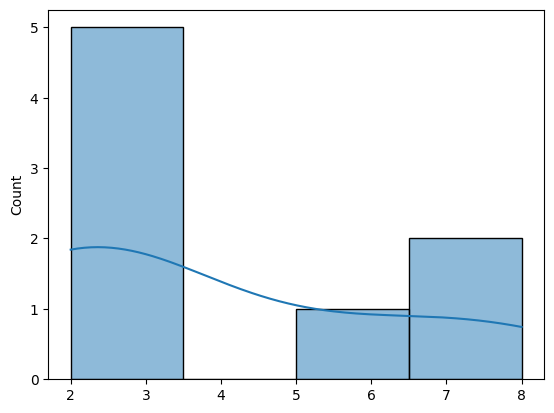

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot([2,3,2,5,7,2,2,8], kde=True);

In [14]:
import numpy as np

In [16]:
def calc_skew(data):
    count = len(data)
    avg = np.mean(data)
    deviation = np.std(data)
    third_moment = np.sum((data - avg) ** 3) / count
    asymmetry_coefficient = third_moment / deviation ** 3
    result = round(asymmetry_coefficient, 2)
    print(f"Коэффициент асимметрии: {result}")
    return result

def calc_excess(data):
    count = len(data)
    avg = np.mean(data)
    deviation = np.std(data)
    fourth_moment = np.sum((data - avg) ** 4) / count
    kurtosis_coefficient = fourth_moment / deviation ** 4 - 3
    result = round(kurtosis_coefficient, 2)
    print(f"Коэффициент эксцесса: {result}")
    return result

data_input = [1, 2, 3, 4, 5, 6, 7, 8, 9]
skew_result = calc_skew(data_input)
excess_result = calc_excess(data_input)

print(f"Результаты анализа:\n- Асимметрия: {skew_result}\n- Эксцесс: {excess_result}")

Коэффициент асимметрии: 0.0
Коэффициент эксцесса: -1.23
Результаты анализа:
- Асимметрия: 0.0
- Эксцесс: -1.23


### Куда и как сдавать работу?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**